# Handling imbalanced data in customer churn prediction

Customer Churn prediction is to measure why customer are leaving a business. In this tutorial we will be looking at customer in telecom busniness. We will biuld a deep learning model to predict the churn and use precision, recall, f1-score to measure preformace of our model. We will then handle imbalance in data using various techniques and improve f1-score 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

Link dataset: https://www.kaggle.com/datasets/ngcminhtrnh/customer-churn

In [2]:
df = pd.read_csv('/kaggle/input/customer-churn/customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df.drop('customerID', axis = 'columns', inplace= True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Visualizition Data

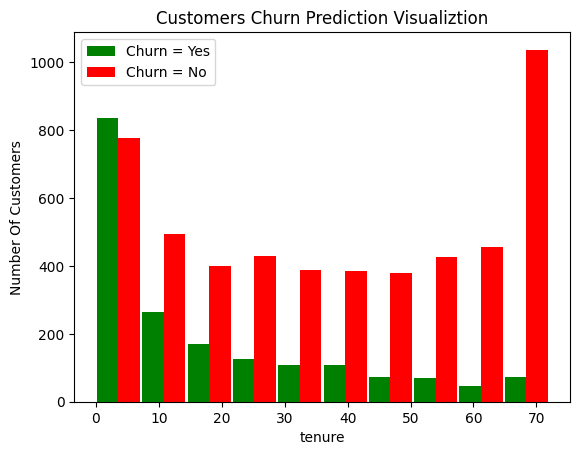

In [6]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number Of Customers')
plt.title('Customers Churn Prediction Visualiztion')

plt.hist([tenure_churn_yes,tenure_churn_no], rwidth = 0.95, color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

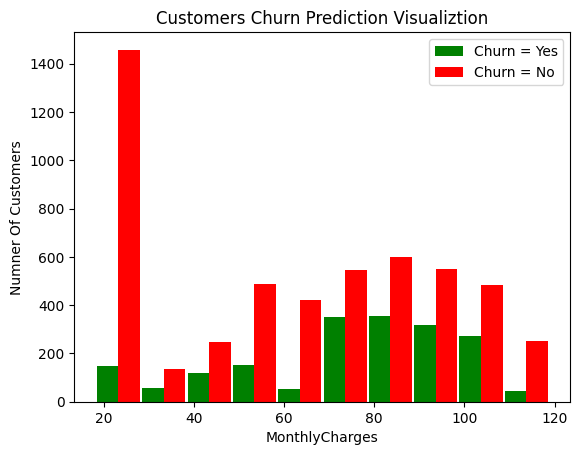

In [7]:
monthly_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Numner Of Customers')
plt.title('Customers Churn Prediction Visualiztion')

plt.hist([monthly_churn_yes, monthly_churn_no], rwidth = 0.95, color = ['green','red'], label = ['Churn = Yes','Churn = No'])
plt.legend()

# Processing Dataset

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges, errors= 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges != ' '].shape

(7032, 20)

In [15]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [20]:
def print_unique_col_values(df):
  for columns in df:
    if df[columns].dtypes == 'object':
      print(f'{columns}: {df[columns].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service', 'No' , inplace = True)
df1.replace('No phone service', 'No', inplace = True)

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)


In [24]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [26]:
df1.gender.unique()

array([1, 0])

In [27]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [29]:
def print_unique_col_values1(df):
       for column in df:
            if df[column].dtypes=='bool':
                print(f'{column}: {df[column].unique()}')

In [30]:
print_unique_col_values(df2)

In [31]:
false_true_columns = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No',
                      'Contract_Month-to-month','Contract_One year','Contract_Two year',
                      'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                      'PaymentMethod_Electronic check','PaymentMethod_Mailed check']

for col in false_true_columns:
    df2[col].replace({False : 0, True : 1}, inplace = True)


In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [34]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Split Data Train and Test

In [36]:
X = df2.drop('Churn', axis = 'columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state= 15,stratify=y)

In [37]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [38]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1


# Build a model (ANN) in tensorflow / keras

In [39]:
# from sklearn.linear_model import LogisticRegression

# def log_reg(X_train, y_train, X_test, y_test,weights):
#   if weights == -1:
#     model = LogisticRegression()
#   else:
#     model = LogisticRegression(class_weight={0 : weights[0], 1 : weights[1]})

#   model.fit(X_train,y_train)
#   acc = model.score(X_test,y_test)
#   print('Accuracy', acc, '\n')

#   y_pred = model.predict(X_test)
#   print('Preds', y_pred[:5], '\n')

#   cl_rep = classification_report(y_test,y_pred)
#   print(cl_rep)


# weights = -1
# log_reg(X_train,y_train,X_test,y_test,weights)

# weights = [1,1.5]
# log_reg(X_train,y_train,X_test,y_test,weights)

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.client import device_lib
from sklearn.metrics import classification_report


def get_avaibable_gpus():
    local_device_protos = device_lib.list_local_devices()
    return[x.name for x in local_device_protos if x.device_type == 'GPU']
print(get_avaibable_gpus())

2024-06-06 08:22:45.605011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 08:22:45.605167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 08:22:45.802128: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[]


In [41]:
def ANN(X_train, y_train, X_test, y_test, optimizer, loss, weights):

      model = Sequential()
      model.add(Dense(26, input_shape = (26,), activation = 'relu'))
      model.add(Dense(15, activation = 'relu'))
      model.add(Dense(1, activation = 'sigmoid'))

      model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])

      if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
      else:
        model.fit(X_train, y_train, epochs = 100, class_weight = weights)

      result = model.evaluate(X_test,y_test)
      print('\nEvaluate Loss: {:.2f}%'.format(result[0] * 100))
      print('\nEvaluate Accuracy: {:.2f}%\n'.format(result[1] * 100))

      y_preds = model.predict(X_test)
      y_preds = np.round(y_preds)

      print('Classification Report: \n', classification_report(y_test,y_preds))

      return y_preds

In [42]:
X_train.shape

(5625, 26)

In [43]:
ANN(X_train,y_train,X_test,y_test, 'adam','binary_crossentropy',-1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7371 - loss: 0.5322
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4365
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4262
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4265
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4320
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4262
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.3993
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8126 - loss: 0.3993
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4019
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8178 - loss: 0.3946
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.3978
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [44]:
y_arr = np.array(y_test)
y_arr[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)

# Resampling strategies for imbalanced datasets

<Axes: title={'center': 'Count(Churn)'}, xlabel='Churn'>

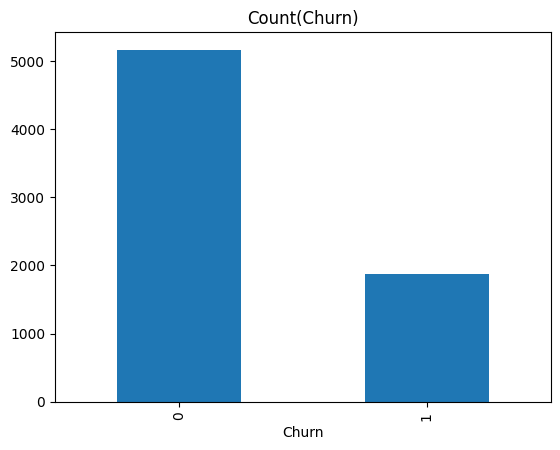

In [45]:
target_count = df2['Churn'].value_counts()
target_count.plot(kind= 'bar', title= 'Count(Churn)')

## Resampling

A widely adoted tecjnique for dealing with highly unbalacend dataset is resampling. It consists of removing sample from the majority class (unber-sampling) and / or adding more examples from the minority class (over-sampling)


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantege of balancing classes, these techniques also have their weakensses (there is no free lunch). The simplest impementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information

Les't implenment a basic example, which uses the `DataFrame.sampple` method to get random samples each class:


In [46]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

## Random Under Sampling

Random under-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


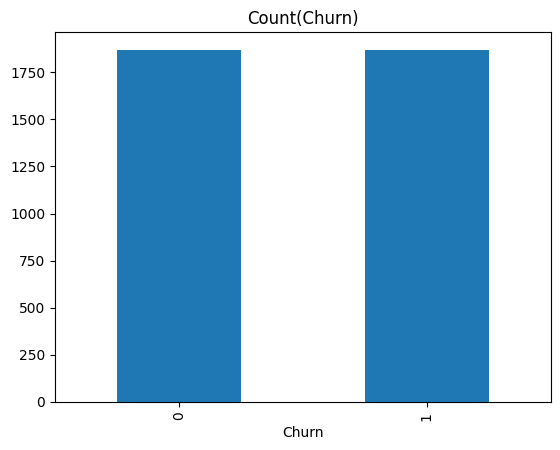

In [48]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1], axis = 0)

print('Random under-sampling: ')
print(df_test_under.Churn.value_counts())

df_test_under.Churn.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [51]:
X_under = df_test_under.drop('Churn',axis = 'columns')
y_under = df_test_under['Churn']

X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X_under, y_under, test_size= 0.2, random_state= 15, stratify= y)

In [52]:
y_train_under.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [54]:
y_preds = ANN(X_train_under,y_train_under,X_test_under,y_test_under, 'adam', 'binary_crossentropy',-1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6044 - loss: 0.6611
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.5267
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.5022
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 0.4892
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7593 - loss: 0.5035
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.4816
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.4806
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4708
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.4809
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.4812
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.4702
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Random Over Smapling

In [55]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_class_1_over['Churn'].value_counts()

Churn
1    5163
Name: count, dtype: int64

In [56]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling: ')
print(df_test_over.Churn.value_counts())

Random over-sampling: 
Churn
0    5163
1    5163
Name: count, dtype: int64


In [59]:
X_over = df_test_over.drop('Churn', axis = 'columns')
y_over = df_test_over['Churn']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 15, stratify=y_over)

In [64]:
y_train_over.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

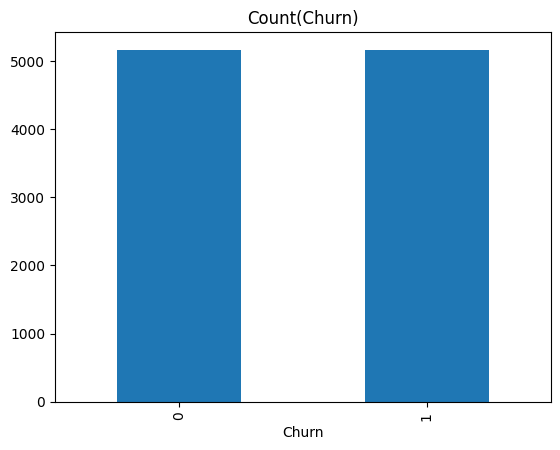

In [68]:
df_test_over.Churn.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [69]:
y_preds_over = ANN(
    X_train_over,
    y_train_over,
    X_test_over,
    y_test_over,
    'adam',
    'binary_crossentropy',
    -1
)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6790 - loss: 0.5998
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.4844
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.4729
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.4759
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4716
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.4641
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7787 - loss: 0.4613
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.4654
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 0.4617
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.4568
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - loss: 0.4641
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

# Python imbalanced-learn module

A number of more sophisticated resapling techniquens have been proposed in the scientific Iiterature.

For exmple, we can cluster the records of the majority class, and to the under-sampling by removing records from each cluster, ths seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's aply some of these resamling techniquens, using the Python library `imbalanced-learn`. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [70]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the `make_classification` method:


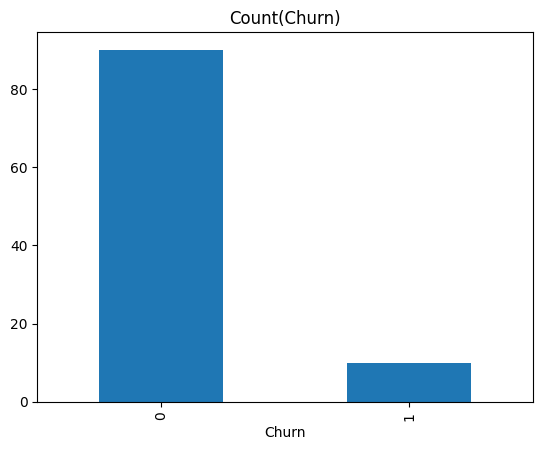

In [90]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes= 2, class_sep= 1.5, weights=[0.9,0.1],
    n_informative= 3, n_redundant= 1, flip_y= 0,
    n_features= 20, n_clusters_per_class= 1,
    n_samples= 100, random_state= 10
)

df_make = pd.DataFrame(X)
df_make['Churn'] = y
df_make.Churn.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

We will also create a 2-dimensional plot funsion, `plot_2d_space`, to see the data distribution:

In [93]:
def plot_2d_space(X, y, label= 'Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c= c, label= l, marker= m
        )
        
    plt.title(label)
    plt.legend(loc= 'upper right')
    plt.show()

Because the dataset has many dimensions (feature) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

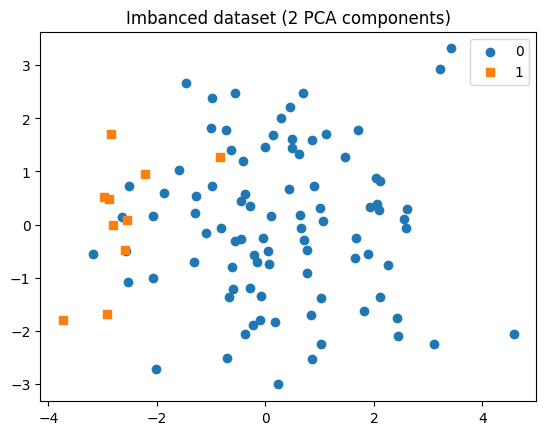

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbanced dataset (2 PCA components)')

# Random under-sampling and over-sampling with imbalanced-learn

In [ ]:
X_under_ib = df2.drop('Churn',axis = 'columns')
y_under_ib = df2['Churn']

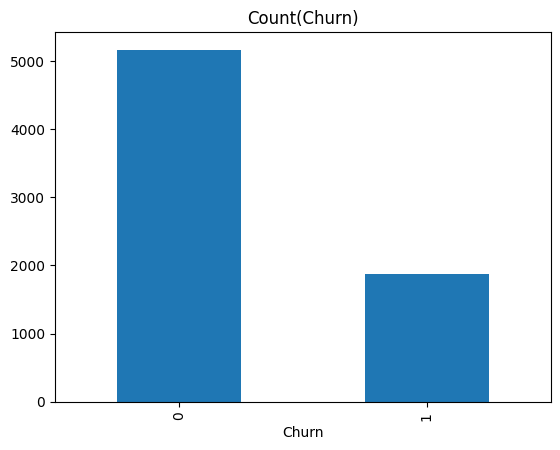

In [124]:
y_under_ib.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [114]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'auto')
X_rus, y_rus = rus.fit_resample(X_under_ib, y_under_ib)

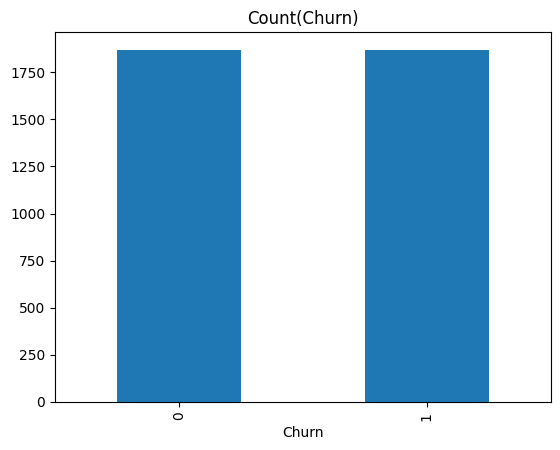

In [125]:
y_rus.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [119]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus, y_rus, test_size= 0.2, random_state= 15, stratify= y_rus)

In [121]:
y_preds = ANN(X_train_rus, y_train_rus,X_test_rus, y_test_rus, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6328 - loss: 0.6493
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7377 - loss: 0.5258
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.4978
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7635 - loss: 0.4767
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.4968
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.4816
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4630
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.4855
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.4667
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.4752
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4670
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# Random over-sampling with imbalanced-learn

In [127]:
X_over_ib = df2.drop('Churn',axis = 'columns')
y_over_ib = df2['Churn']

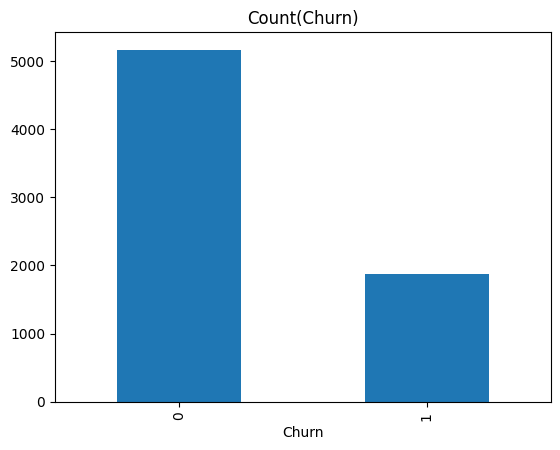

In [128]:
y_over_ib.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [129]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_over_ib, y_over_ib)

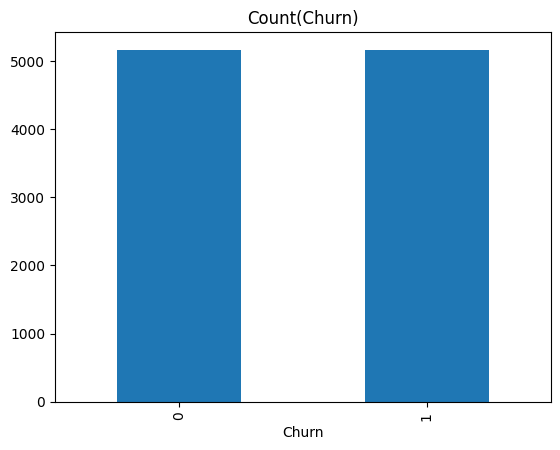

In [131]:
y_ros.value_counts().plot(kind= 'bar', title= 'Count(Churn)')
plt.show()

In [132]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros, y_ros, test_size= 0.2, random_state= 15, stratify= y_ros)

In [133]:
y_preds = ANN(X_train_ros, y_train_ros, X_test_ros, y_test_ros, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6300 - loss: 0.6296
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.4902
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4866
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.4850
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.4755
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4819
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4746
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.4679
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4662
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4649
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.4677
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

# Under-sampling: Tomek Links

Tomek link are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

In the code below, We'll use `ratio = 'majority` to resample the majortity class

In [147]:
X_tl = df2.drop('Churn',axis = 'columns')
y_tl = df2['Churn']

In [148]:
y_tl.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [149]:
from imblearn.under_sampling import TomekLinks 

tl = TomekLinks(sampling_strategy = 'majority')
X_tl_re, y_tl_re = tl.fit_resample(X_tl,y_tl)

In [150]:
y_tl_re.value_counts()

Churn
0    4670
1    1869
Name: count, dtype: int64

In [151]:
X_train_tl,X_test_tl,y_train_tl,y_test_tl = train_test_split(X_tl_re, y_tl_re, test_size= 0.2, random_state= 15, stratify= y_tl_re)

In [153]:
preds = ANN(X_train_tl, y_train_tl, X_test_tl, y_test_tl, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6626 - loss: 0.5936
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4357
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4044
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4108
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4065
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.4049
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.4058
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.4070
Epoch 9/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.3918
Epoch 10/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.3930
Epoch 11/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.3929
Epoch 12/100
164/164 ━━━━━━━━━━━━━━━━━━━━

# Under-sampling: Cluster Centroids

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarily, in order to preserve information

In this example we will pass the `{0: 10}` dict for the parameter `radio`,  to preserve 10 elements from the majorriyt class(0), and all minority class (1)


In [160]:
X_cc = df2.drop('Churn',axis = 'columns')
y_cc = df2['Churn']

In [161]:
y_cc.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [162]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_cc,y_cc)

In [163]:
y_cc.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [164]:
X_train_cc,X_test_cc,y_train_cc,y_test_cc = train_test_split(X_cc, y_cc, test_size= 0.2, random_state= 15, stratify= y_cc)

In [165]:
preds = ANN(X_train_cc, y_train_cc, X_test_cc, y_test_cc, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5889 - loss: 0.6575
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.5225
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4858
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4782
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.4675
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4590
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4474
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4349
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4421
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4387
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4413
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# Over-sampling: SMOTE

SMOTE(Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picing a point from the minority class and computing  the K-nearest nightbors for this point. The synthetic points are added between the chosen point and its neighbors.


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [167]:
X_sm = df2.drop('Churn',axis = 'columns')
y_sm = df2['Churn']

In [168]:
y_sm.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [169]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_sm,y_sm)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [170]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state= 15, stratify=y_sm)

In [172]:
y_preds = ANN(X_train_sm, y_train_sm, X_test_sm, y_test_sm, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6676 - loss: 0.6048
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.4721
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.4663
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7765 - loss: 0.4604
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.4624
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.4578
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4347
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4395
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4383
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4334
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.4162
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

# Over-sampling followed by under-sampling

In [173]:
X_smt = df2.drop('Churn',axis = 'columns')
y_smt = df2['Churn']

In [174]:
y_smt.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [175]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy= 'auto')
X_smt, y_smt = smt.fit_resample(X_smt, y_smt)

In [176]:
y_smt.value_counts()

Churn
0    4882
1    4882
Name: count, dtype: int64

In [177]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size = 0.2, random_state= 15, stratify=y_smt)

In [178]:
ANN(X_train_smt, y_train_smt, X_test_smt, y_test_smt, 'adam', 'binary_crossentropy', -1)

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6647 - loss: 0.5981
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4518
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4414
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4429
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4194
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4146
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.3991
Epoch 8/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4102
Epoch 9/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.3910
Epoch 10/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.3972
Epoch 11/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.3898
Epoch 12/100
245/245 ━━━━━━━━━━━━━━━━━━━━

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)